<h1><center> Assignment 1 - Machine Learning with Spark </center></h1>
<h2><center> Chrislin Priscilla </center></h2>


<h3> Part 1: </h3> Reading comma separated file and loading in to spark dataframe 
    
    

In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
#sc = SparkContext("local")
filename="MSD.txt"
spark = SparkSession.builder.getOrCreate()
data = spark.read.load(filename , format = 'csv',header = 'false', inferschema = 'true', sep= ",")
data.printSchema()


root
 |-- _c0: integer (nullable = true)
 |-- _c1: double (nullable = true)
 |-- _c2: double (nullable = true)
 |-- _c3: double (nullable = true)
 |-- _c4: double (nullable = true)
 |-- _c5: double (nullable = true)
 |-- _c6: double (nullable = true)
 |-- _c7: double (nullable = true)
 |-- _c8: double (nullable = true)
 |-- _c9: double (nullable = true)
 |-- _c10: double (nullable = true)
 |-- _c11: double (nullable = true)
 |-- _c12: double (nullable = true)
 |-- _c13: double (nullable = true)
 |-- _c14: double (nullable = true)
 |-- _c15: double (nullable = true)
 |-- _c16: double (nullable = true)
 |-- _c17: double (nullable = true)
 |-- _c18: double (nullable = true)
 |-- _c19: double (nullable = true)
 |-- _c20: double (nullable = true)
 |-- _c21: double (nullable = true)
 |-- _c22: double (nullable = true)
 |-- _c23: double (nullable = true)
 |-- _c24: double (nullable = true)
 |-- _c25: double (nullable = true)
 |-- _c26: double (nullable = true)
 |-- _c27: double (nullable = tr

<h3> Part 1: </h3> count of the number of data points 
    
    

In [3]:
data.count()

515345

<h3> Part 1: </h3> Printing first 40 instances 

In [4]:
data.head(40)

[Row(target=2001, _c1=49.94357, _c2=21.47114, _c3=73.0775, _c4=8.74861, _c5=-17.40628, _c6=-13.09905, _c7=-25.01202, _c8=-12.23257, _c9=7.83089, _c10=-2.46783, _c11=3.32136, _c12=-2.31521, _c13=10.20556, _c14=611.10913, _c15=951.0896, _c16=698.11428, _c17=408.98485, _c18=383.70912, _c19=326.51512, _c20=238.11327, _c21=251.42414, _c22=187.17351, _c23=100.42652, _c24=179.19498, _c25=-8.41558, _c26=-317.87038, _c27=95.86266, _c28=48.10259, _c29=-95.66303, _c30=-18.06215, _c31=1.96984, _c32=34.42438, _c33=11.7267, _c34=1.3679, _c35=7.79444, _c36=-0.36994, _c37=-133.67852, _c38=-83.26165, _c39=-37.29765, _c40=73.04667, _c41=-37.36684, _c42=-3.13853, _c43=-24.21531, _c44=-13.23066, _c45=15.93809, _c46=-18.60478, _c47=82.15479, _c48=240.5798, _c49=-10.29407, _c50=31.58431, _c51=-25.38187, _c52=-3.90772, _c53=13.29258, _c54=41.5506, _c55=-7.26272, _c56=-21.00863, _c57=105.50848, _c58=64.29856, _c59=26.08481, _c60=-44.5911, _c61=-8.30657, _c62=7.93706, _c63=-10.7366, _c64=-95.44766, _c65=-82.03

Renaming Data Columns

In [5]:
data = data.withColumnRenamed("_c0", "target")

<h3> Part 2: </h3> Normalize features between 0 and 1
    
References: https://www.datacamp.com/community/tutorials/apache-spark-tutorial-machine-learning

In [7]:
from pyspark.ml.linalg import DenseVector

input_data = data.rdd.map(lambda x: (x[0], DenseVector(x[1:])))

df = spark.createDataFrame(input_data, ["target", "features"])

In [10]:
input_data.collect()

[(2001,
  DenseVector([49.9436, 21.4711, 73.0775, 8.7486, -17.4063, -13.099, -25.012, -12.2326, 7.8309, -2.4678, 3.3214, -2.3152, 10.2056, 611.1091, 951.0896, 698.1143, 408.9848, 383.7091, 326.5151, 238.1133, 251.4241, 187.1735, 100.4265, 179.195, -8.4156, -317.8704, 95.8627, 48.1026, -95.663, -18.0622, 1.9698, 34.4244, 11.7267, 1.3679, 7.7944, -0.3699, -133.6785, -83.2616, -37.2976, 73.0467, -37.3668, -3.1385, -24.2153, -13.2307, 15.9381, -18.6048, 82.1548, 240.5798, -10.2941, 31.5843, -25.3819, -3.9077, 13.2926, 41.5506, -7.2627, -21.0086, 105.5085, 64.2986, 26.0848, -44.5911, -8.3066, 7.9371, -10.7366, -95.4477, -82.0331, -35.5919, 4.6952, 70.9563, 28.0914, 6.0202, -37.1377, -41.1245, -8.4082, 7.1988, -8.6018, -5.9086, -12.3244, 14.6873, -54.3212, 40.1479, 13.0162, -54.4055, 58.9937, 15.3734, 1.1114, -23.0879, 68.408, -1.8222, -27.4635, 2.2633])),
 (2001,
  DenseVector([48.7322, 18.4293, 70.3268, 12.9464, -10.3244, -24.8378, 8.7663, -0.9202, 18.7655, 4.5921, 2.2192, 0.3401, 44.39, 2

In [11]:
from pyspark.ml.feature import StandardScaler


standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")


scaler = standardScaler.fit(df)


scaled_df = scaler.transform(df)


scaled_df.take(2)

[Row(target=2001, features=DenseVector([49.9436, 21.4711, 73.0775, 8.7486, -17.4063, -13.099, -25.012, -12.2326, 7.8309, -2.4678, 3.3214, -2.3152, 10.2056, 611.1091, 951.0896, 698.1143, 408.9848, 383.7091, 326.5151, 238.1133, 251.4241, 187.1735, 100.4265, 179.195, -8.4156, -317.8704, 95.8627, 48.1026, -95.663, -18.0622, 1.9698, 34.4244, 11.7267, 1.3679, 7.7944, -0.3699, -133.6785, -83.2616, -37.2976, 73.0467, -37.3668, -3.1385, -24.2153, -13.2307, 15.9381, -18.6048, 82.1548, 240.5798, -10.2941, 31.5843, -25.3819, -3.9077, 13.2926, 41.5506, -7.2627, -21.0086, 105.5085, 64.2986, 26.0848, -44.5911, -8.3066, 7.9371, -10.7366, -95.4477, -82.0331, -35.5919, 4.6952, 70.9563, 28.0914, 6.0202, -37.1377, -41.1245, -8.4082, 7.1988, -8.6018, -5.9086, -12.3244, 14.6873, -54.3212, 40.1479, 13.0162, -54.4055, 58.9937, 15.3734, 1.1114, -23.0879, 68.408, -1.8222, -27.4635, 2.2633]), features_scaled=DenseVector([8.2312, 0.4163, 2.072, 0.536, -0.7614, -1.0188, -1.7165, -1.536, 0.74, -0.3779, 0.7599, -0.2

<h3> Part 3: </h3> Shifting Labels

In [8]:

row1 = scaled_df.agg({"target": "min"}).collect()[0]
minimum=row1["min(target)"]


In [9]:
scaled_df = scaled_df.withColumn("target", scaled_df["target"]-minimum)

scaled_df.take(2)

[Row(target=79, features=DenseVector([49.9436, 21.4711, 73.0775, 8.7486, -17.4063, -13.099, -25.012, -12.2326, 7.8309, -2.4678, 3.3214, -2.3152, 10.2056, 611.1091, 951.0896, 698.1143, 408.9848, 383.7091, 326.5151, 238.1133, 251.4241, 187.1735, 100.4265, 179.195, -8.4156, -317.8704, 95.8627, 48.1026, -95.663, -18.0622, 1.9698, 34.4244, 11.7267, 1.3679, 7.7944, -0.3699, -133.6785, -83.2616, -37.2976, 73.0467, -37.3668, -3.1385, -24.2153, -13.2307, 15.9381, -18.6048, 82.1548, 240.5798, -10.2941, 31.5843, -25.3819, -3.9077, 13.2926, 41.5506, -7.2627, -21.0086, 105.5085, 64.2986, 26.0848, -44.5911, -8.3066, 7.9371, -10.7366, -95.4477, -82.0331, -35.5919, 4.6952, 70.9563, 28.0914, 6.0202, -37.1377, -41.1245, -8.4082, 7.1988, -8.6018, -5.9086, -12.3244, 14.6873, -54.3212, 40.1479, 13.0162, -54.4055, 58.9937, 15.3734, 1.1114, -23.0879, 68.408, -1.8222, -27.4635, 2.2633]), features_scaled=DenseVector([8.2312, 0.4163, 2.072, 0.536, -0.7614, -1.0188, -1.7165, -1.536, 0.74, -0.3779, 0.7599, -0.278

<h3> Part 4: </h3> Split dataset into training, validation and test set.

In [11]:
train_data, test_set = scaled_df.randomSplit([.8,.2],seed=1234)
train_set, validation_set = train_data.randomSplit([.7,.3],seed=1234)

<h3> Part 4: </h3> Baseline Model by taking the mode of traget from training Data

In [56]:
row1 = train_data.agg({"target": "max"}).collect()[0]
maximum_point=row1["max(target)"]


In [57]:
predict = test_set.rdd.map(lambda x: maximum_point)
labels = test_set.select("target").rdd.map(lambda x: x[0])

<h3> Part 4: </h3> Function to give Root mean square error given a RDD and printing RMSE

In [58]:
import math
from operator import add
predictionAndLabel = predict.zip(labels).collect()

def rmse(predict,n):
    p=predict.map(lambda x: (x[0] - x[1]) ** 2)
    q=p.reduce(lambda x,y: x+y)
    return math.sqrt(q/n)
evaluate = spark.createDataFrame(predictionAndLabel, ["predict", "actual"])
rmse_val=rmse(evaluate.rdd,test_set.count())
print("the rmse is:", rmse_val)

the rmse is: 16.648327599092045


<H3> Part 5: </h3> Predicted vs actual using a scatter plot

Text(0, 0.5, 'Predicted')

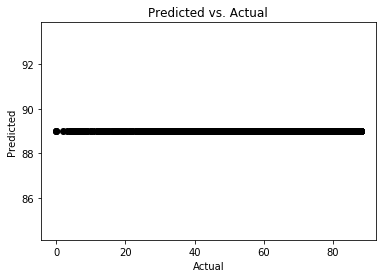

In [63]:

import matplotlib.pyplot as plt

x = [p[0] for p in evaluate.select("actual").collect()]
y = [p[0] for p in evaluate.select("predict").collect()]
fig, ax = plt.subplots()
ax.plot(x, y,'o', color='black')
plt.title('Predicted vs. Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')